In [1]:
%matplotlib nbagg
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


# Levanto la data

In [2]:
import pandas as pd
from urllib import urlopen

with open('indicadores.csv', 'w') as f:
    f.write(urlopen('http://blog.jazzido.com/indicadoresEducativosAR/indicadores.csv').read())
    
df = pd.read_csv('indicadores.csv').set_index('id')

# Acceso a los datos 

In [3]:
def get_series(df, nivel, variable):
    """
    Construye un diccionario, donde los keys son los lugares (i.e. buenos aires) y los values son una serie de tiempo
    que corresponde a los valores asociados al nivel y variable
    """
    res = {}
    for place, row in df.iterrows():
        index = []
        values = []
        for year in xrange(2003, 2010):
            key = '{variable}{year}_{nivel}'.format(**locals())
            index.append(year)
            values.append(row[key])
        res[place] = pd.Series(values,index=index)
    return res

# Calculo de una estadística sencilla

El porcentaje de cambio entre el 2003 y el 2009 respecto a la tasa de promocion por provincia

# Calculo el cambio relativo entre 2003 y 2009 para algunos niveles 

In [31]:
from collections import defaultdict

def get_stats(relativas):
    niveles = 'egb_1 egb_2 egb_3 egb_4 egb_5 egb_6 egb_7 egb_8 egb_9'.split()
    diffs = defaultdict(dict)

    for nivel in niveles:
        for place, series in get_series(df, nivel, 'promocion').iteritems():
            diff = (series.loc[2009] - series.loc[2003])
            if relativas: diff /= series.loc[2003]
                
            diffs[place][nivel] = diff

    return diffs

# Luego visualizo esto en un grafico de barras por provincia

Es muy interesante ver como algunas provincias son parejas (como Santiago del Estero) en los distintos niveles, mientras otras estan totalmente desbalanceadas (como La Rioja)

<IPython.core.display.Javascript object>


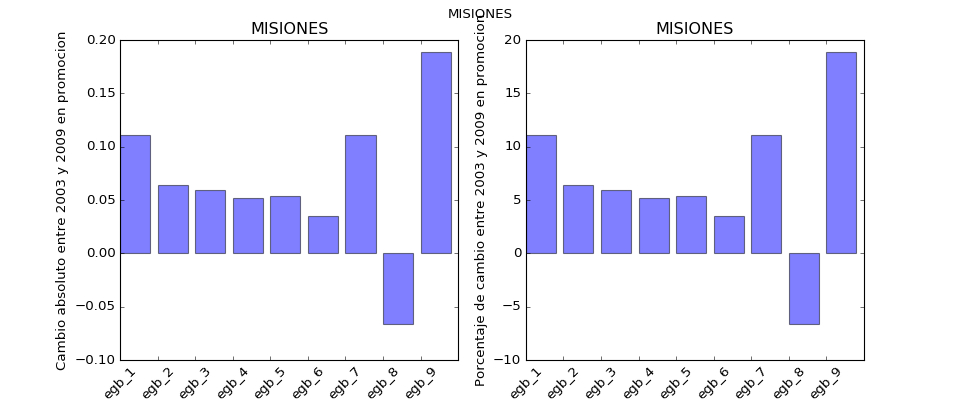

<IPython.core.display.Javascript object>


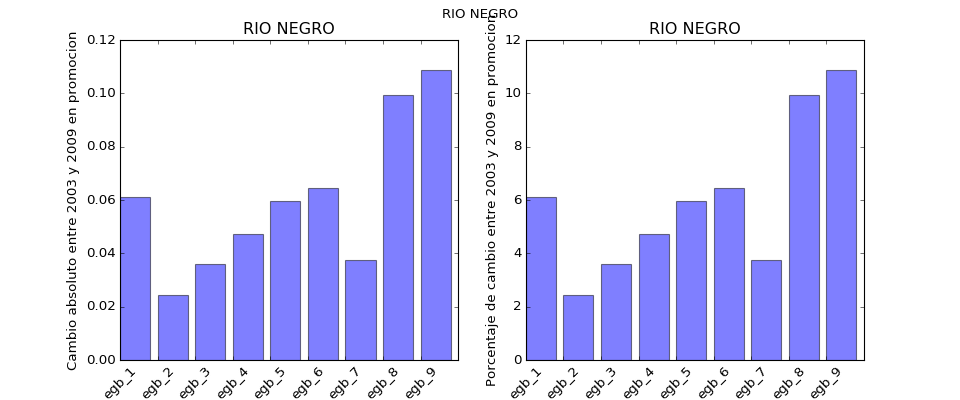

<IPython.core.display.Javascript object>


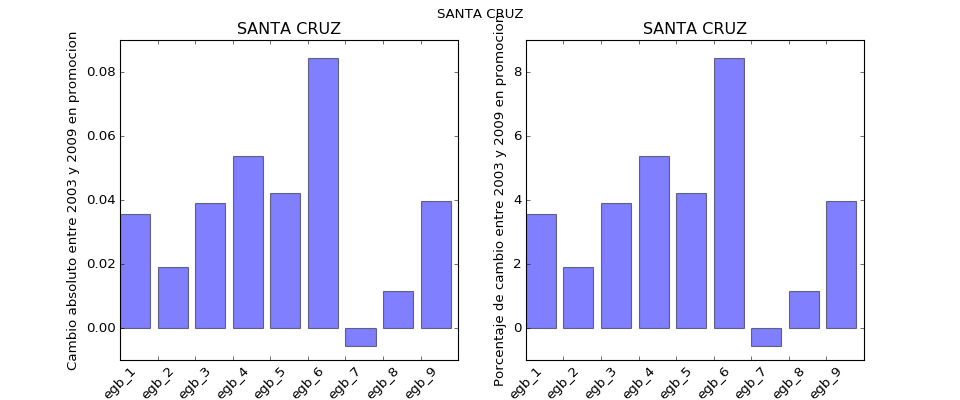

<IPython.core.display.Javascript object>


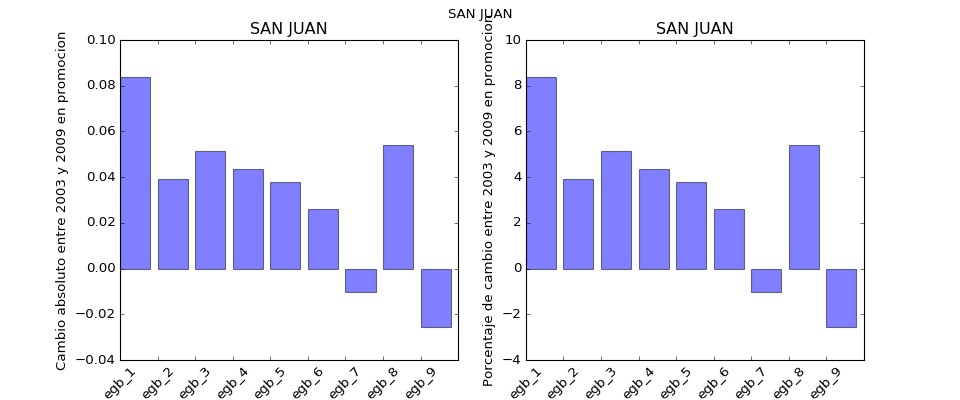

<IPython.core.display.Javascript object>


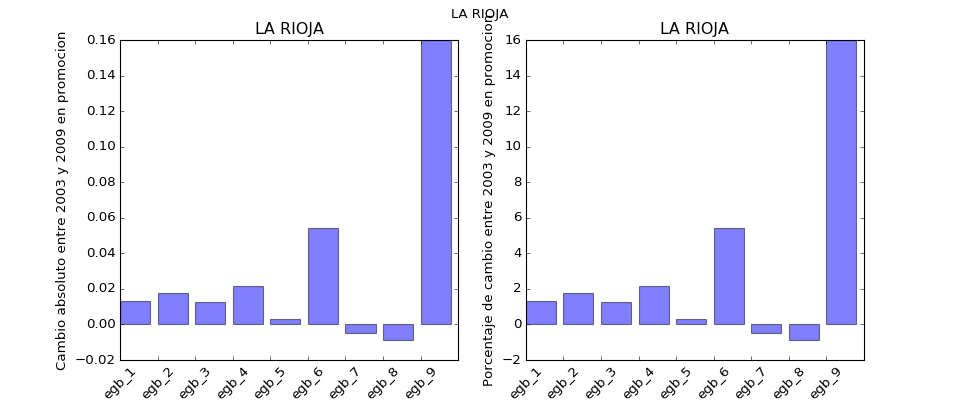

<IPython.core.display.Javascript object>


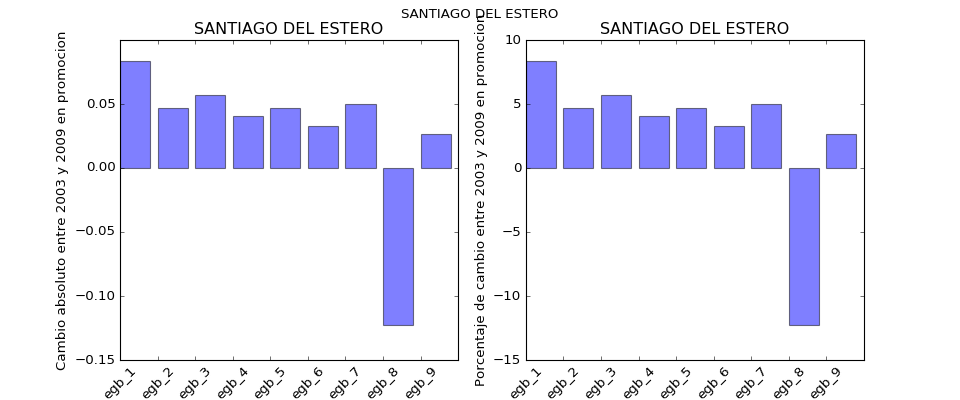

<IPython.core.display.Javascript object>


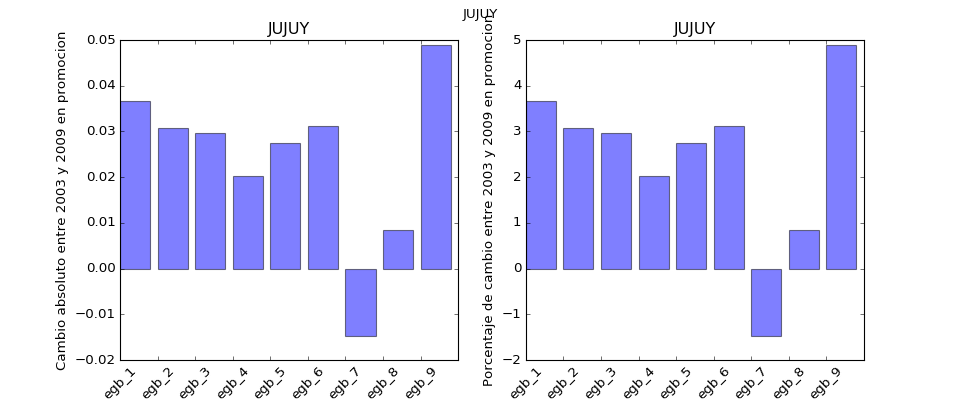

<IPython.core.display.Javascript object>


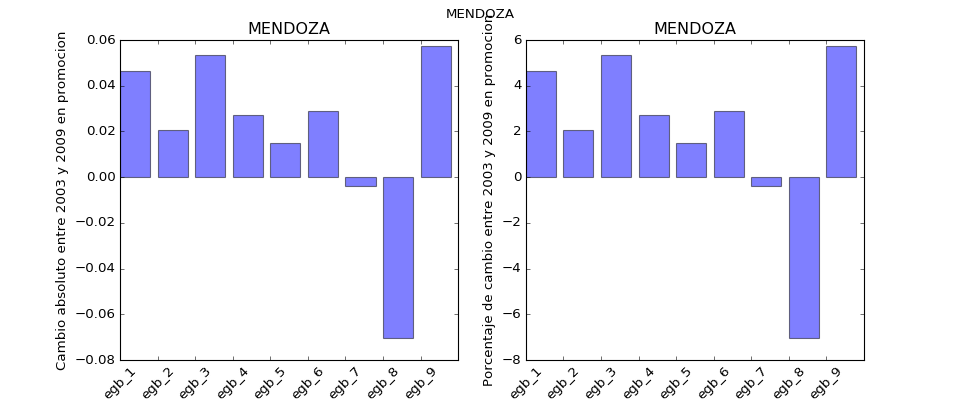

<IPython.core.display.Javascript object>


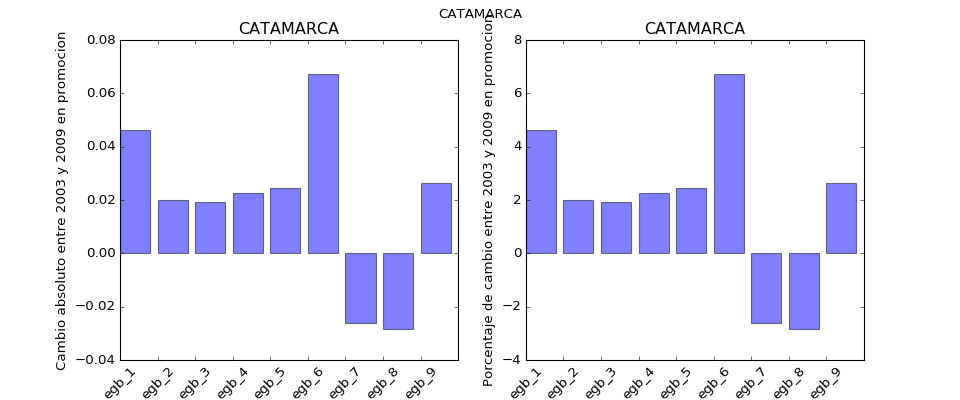

<IPython.core.display.Javascript object>


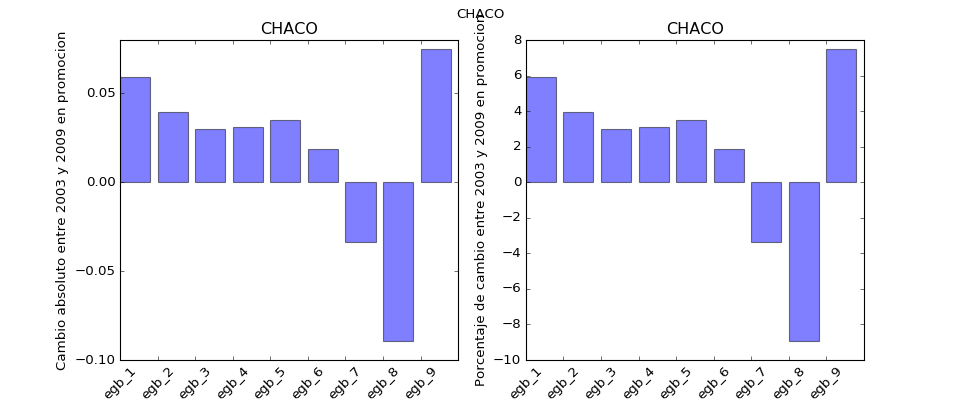

<IPython.core.display.Javascript object>


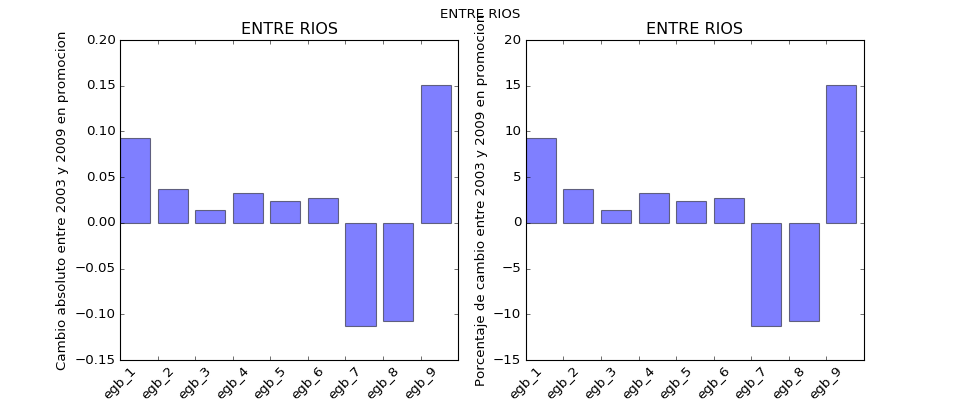

<IPython.core.display.Javascript object>


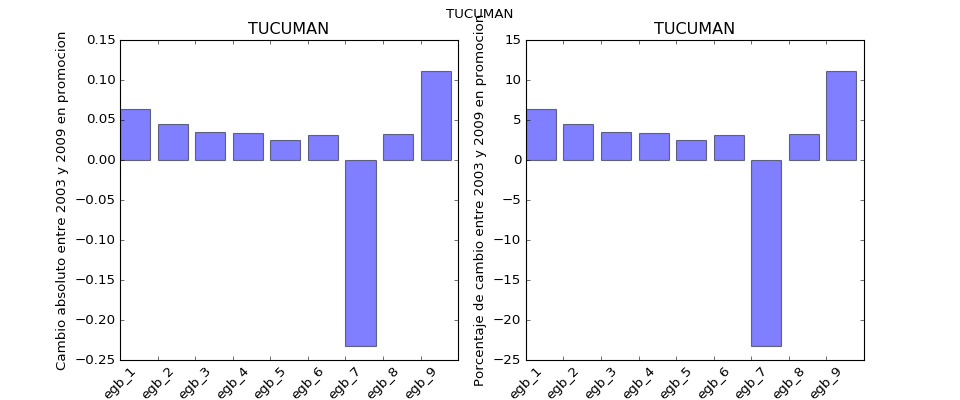

<IPython.core.display.Javascript object>


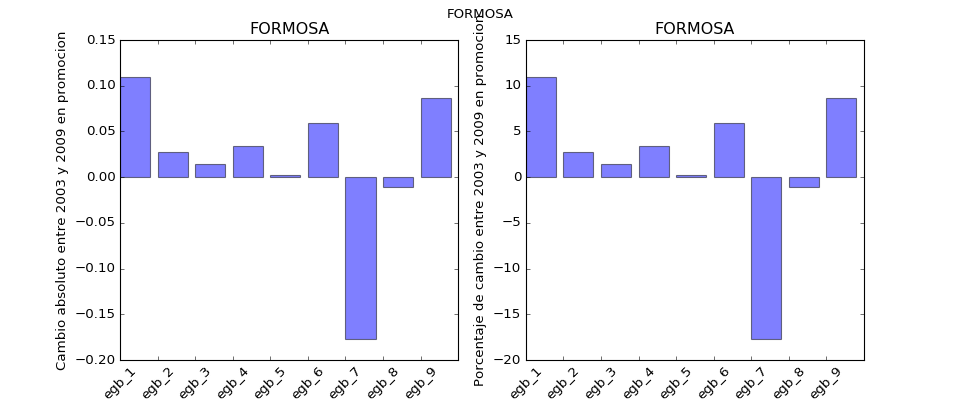

<IPython.core.display.Javascript object>


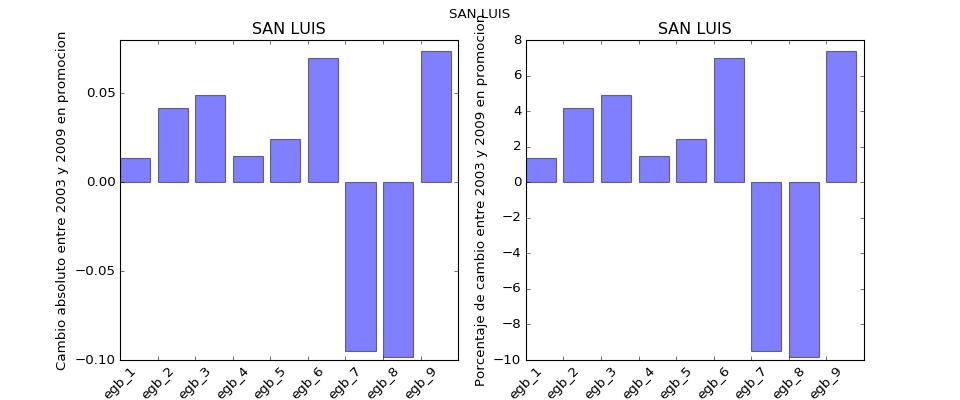

<IPython.core.display.Javascript object>


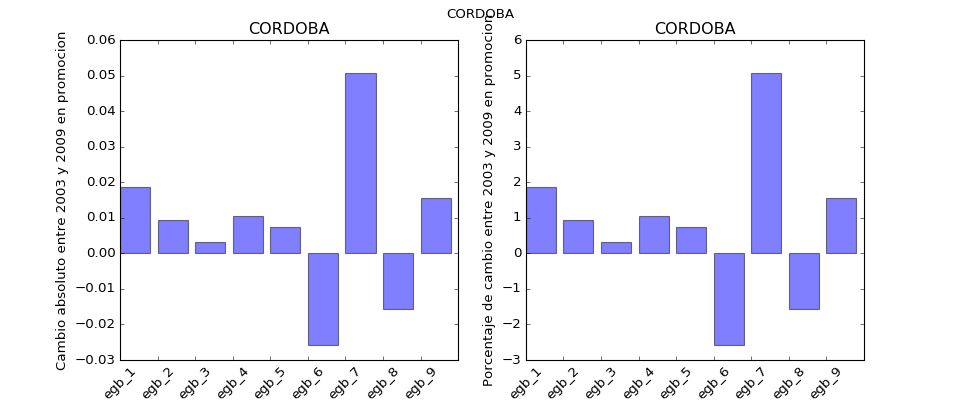

<IPython.core.display.Javascript object>


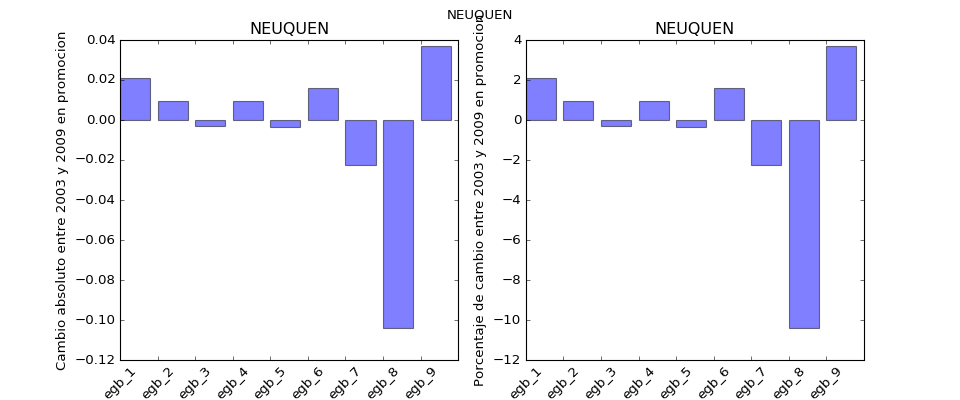

<IPython.core.display.Javascript object>


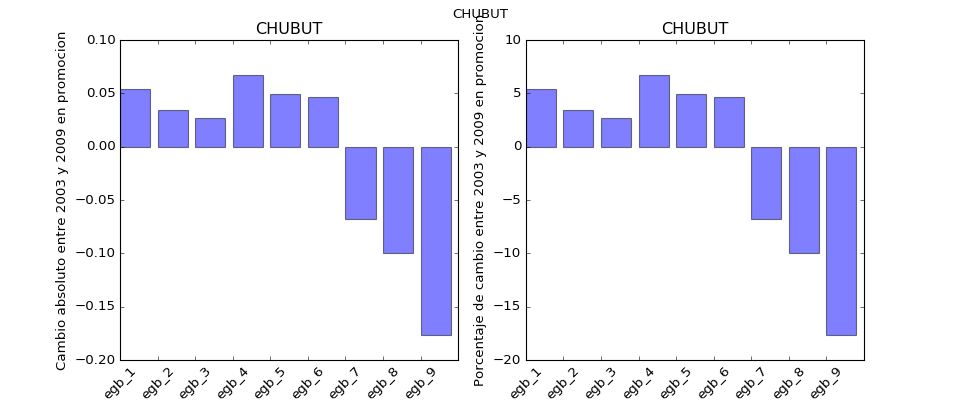

<IPython.core.display.Javascript object>


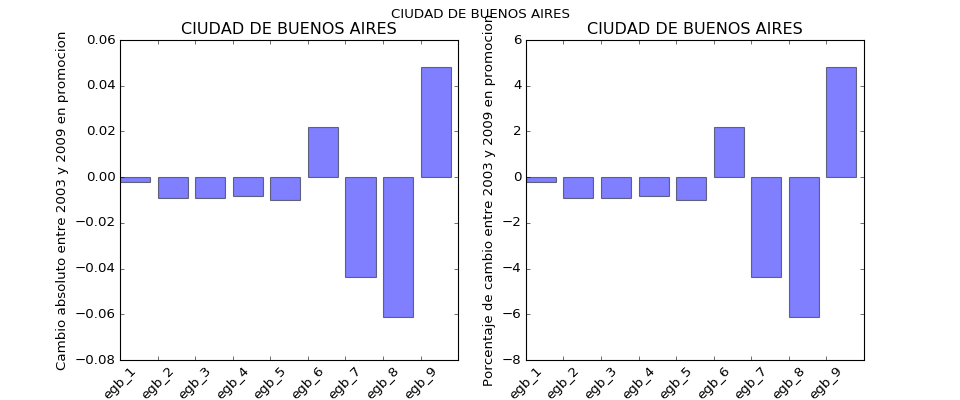

<IPython.core.display.Javascript object>


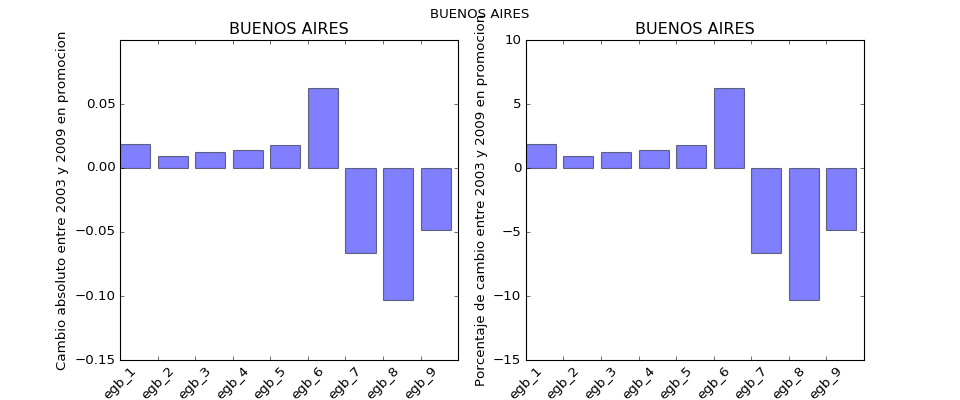

<IPython.core.display.Javascript object>


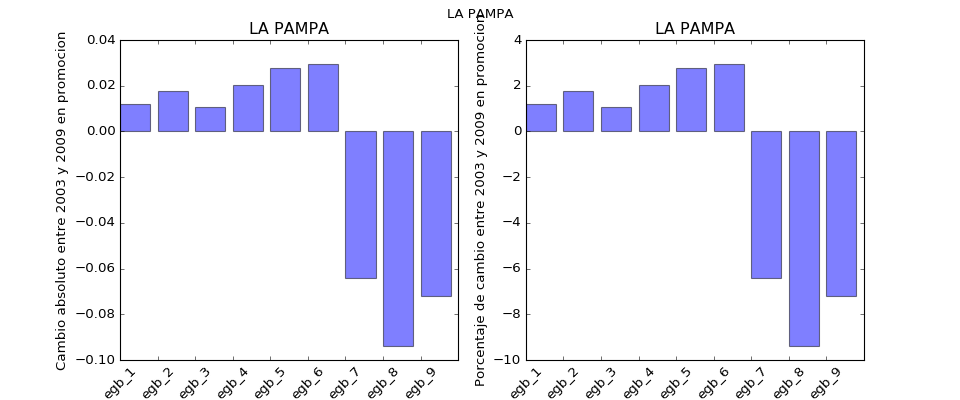

<IPython.core.display.Javascript object>


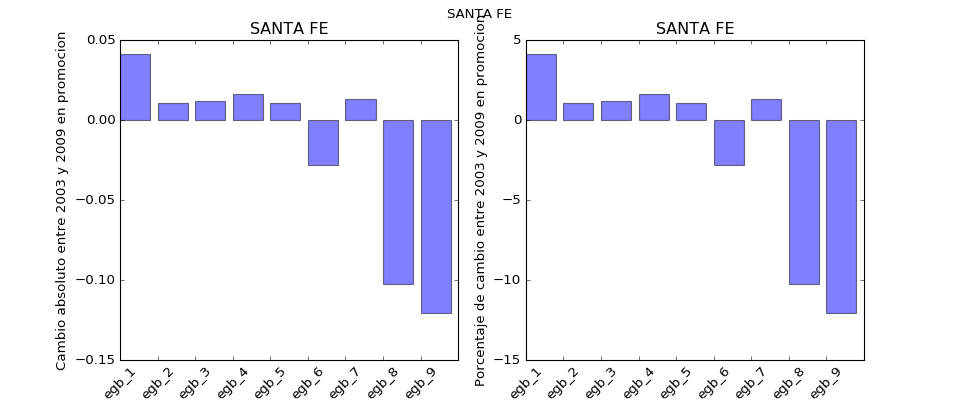

<IPython.core.display.Javascript object>


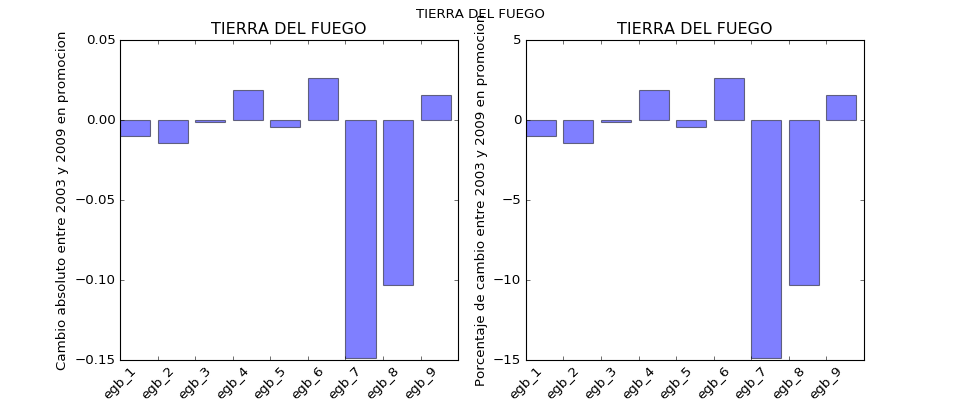

<IPython.core.display.Javascript object>


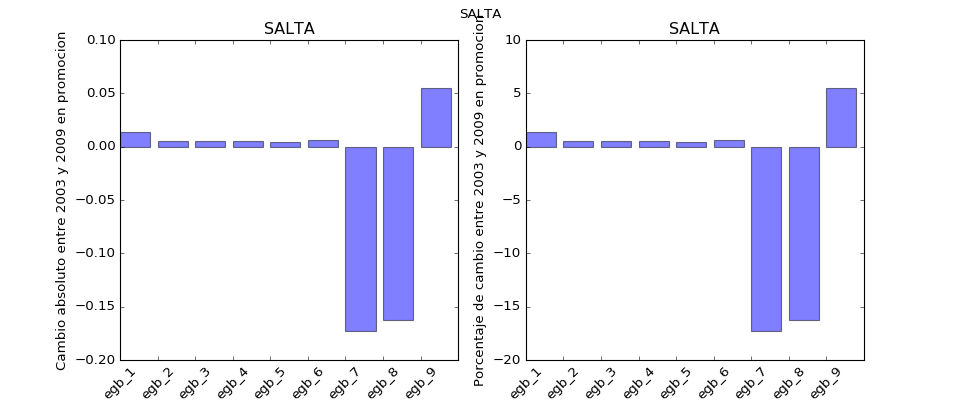

<IPython.core.display.Javascript object>


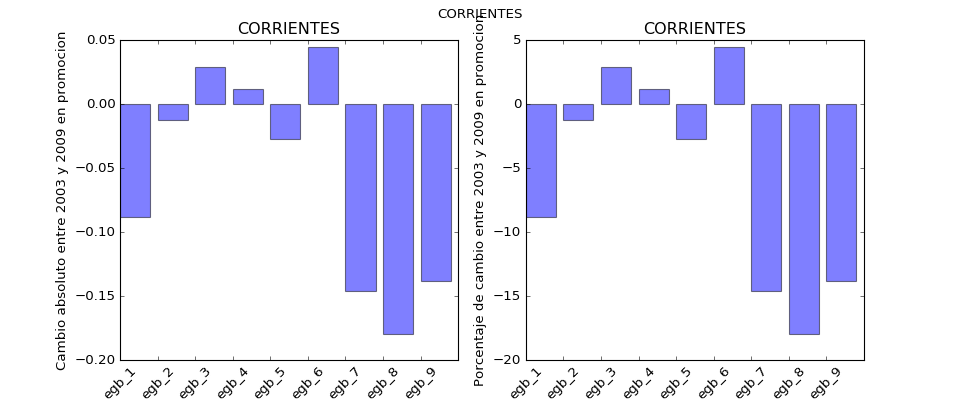

In [39]:
# Imprimo los resultados, de "mejores" a "peores"
def plot_diff(place, place_data, relativas):
    title(place)
    place_data = sorted(place_data.iteritems(), key=lambda x:int(x[0].split('_')[1]))
    for i, (nivel, diff) in enumerate(place_data):
        bar(i, diff * (100 if relativas else 1), alpha=0.5)

    if relativas:
        ylabel('Porcentaje de cambio entre 2003 y 2009 en promocion')
    else:
        ylabel('Cambio absoluto entre 2003 y 2009 en promocion')
        
    xticks(range(len(place_data)), zip(*place_data)[0], rotation=45)

rel_diffs = get_stats(relativas=True)
abs_diffs = get_stats(relativas=True)

for place, place_data in sorted(rel_diffs.iteritems(), key=lambda x:-sum(x[1].values())):
    figure(figsize=(12,5))
    suptitle(place)

    subplot(121)
    plot_diff(place, place_data, relativas=False)
    
    subplot(122)
    plot_diff(place, rel_diffs[place], relativas=True)
    